<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/da_ce_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

<center>
<font color="#41a8c7">
<h2><b>
Caso 02 Deteccion de Anomalias Declaracion Jurada Ingresos Brutos

</font>
</center>

## Carga de librerías necesarias

In [1]:
!pip install prophet --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.21.6 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.


### Analisis de datos

In [2]:
import numpy as np
import pandas as pd

In [3]:
from prophet import Prophet

### Modelo y preprocesamiento

### Graficos

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta
import plotly.offline as py
import matplotlib.pyplot as plt

In [5]:
from prophet.plot import (plot_plotly,
                          plot_components_plotly,
                          plot_forecast_component_plotly,
                          plot_seasonality_plotly)

## Obtención de los Datos

### Extracción de Datos - Creación del DataFrame

In [6]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_12_Deteccion%20de%20Anomalias/datos01.csv"

In [7]:
df = pd.read_csv(datos, index_col=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ORIGEN                             79 non-null     object 
 1   CUIT                               79 non-null     int64  
 2   PERIODO                            79 non-null     int64  
 3   CUOTA                              79 non-null     int64  
 4   COD ACTIVIDAD                      79 non-null     int64  
 5   DESCRIPCION CODIGO PROV            79 non-null     object 
 6   ALICUOTA                           79 non-null     float64
 7   BASE IMPONIBLE                     79 non-null     float64
 8   IMPUESTO Calculado Alícuota        79 non-null     float64
 9   IMPUESTO DETERMINADO (ADIB / DIU)  79 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.8+ KB


## Análisis Exploratorio de los Datos

###Limpieza de caracteres en el conjunto de datos

In [9]:
cleancolumn = []
for i in range(len(df.columns)):
    cleancolumn.append(df.columns[i].replace('-', '').lower())
df.columns = cleancolumn

In [10]:
df

,origen,cuit,periodo,cuota,cod actividad,descripcion codigo prov,alicuota,base imponible,impuesto calculado alícuota,impuesto determinado (adib / diu)
0,ADIB,30538596112,2015,1,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,1542649.10,61705.96,61705.96
1,ADIB,30538596112,2015,2,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2826481.24,113059.24,113059.24
2,ADIB,30538596112,2015,3,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2819790.62,112791.62,112791.62
3,ADIB,30538596112,2015,4,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,2904493.66,116179.74,116179.74
4,ADIB,30538596112,2015,5,631027,VTA PIZ/EMPAN/HAMB/PARRILL/BEBIDA-C/SERV.MESA,4.0,3039687.52,121587.50,121587.50
...,...,...,...,...,...,...,...,...,...,...
74,DIU,30538596112,2021,4,561019,SS DE EXPENDIO COMIDAS Y BEBIDAS EN ESTABLECIM...,2.0,11116559.12,222331.18,222331.18
75,DIU,30538596112,2021,5,561019,SS DE EXPENDIO COMIDAS Y BEBIDAS EN ESTABLECIM...,2.0,9678823.72,193576.47,193576.47
76,DIU,30538596112,2021,6,561019,SS DE EXPENDIO COMIDAS Y BEBIDAS EN ESTABLECIM...,2.0,13214299.07,264285.98,264285.98
77,DIU,30538596112,2021,7,561019,SS DE EXPENDIO COMIDAS Y BEBIDAS EN ESTABLECIM...,2.0,21268840.75,425376.82,425376.82


### Análisis descriptivo

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cuit,79.0,3.053860e+10,0.000000e+00,3.053860e+10,3.053860e+10,3.053860e+10,3.053860e+10,3.053860e+10
periodo,79.0,2.017823e+03,1.939862e+00,2.015000e+03,2.016000e+03,2.018000e+03,2.019000e+03,2.021000e+03
cuota,79.0,6.303797e+00,3.450583e+00,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
cod actividad,79.0,6.035595e+05,3.440556e+04,5.610190e+05,5.610190e+05,6.310270e+05,6.310350e+05,6.310350e+05
alicuota,79.0,4.205696e+00,7.749685e-01,2.000000e+00,4.250000e+00,4.500000e+00,4.500000e+00,4.750000e+00
base imponible,79.0,4.953488e+06,3.491995e+06,2.400992e+05,2.940874e+06,3.873860e+06,5.599008e+06,2.126884e+07
impuesto calculado alícuota,79.0,1.904153e+05,9.575356e+04,1.140471e+04,1.202766e+05,1.672985e+05,2.352380e+05,5.123743e+05
impuesto determinado (adib / diu),79.0,1.904153e+05,9.575356e+04,1.140471e+04,1.202766e+05,1.672985e+05,2.352380e+05,5.123743e+05


### Valores faltantes

In [12]:
df.isnull().sum()

origen                               0
cuit                                 0
periodo                              0
cuota                                0
cod actividad                        0
descripcion codigo prov              0
alicuota                             0
base imponible                       0
impuesto calculado alícuota          0
impuesto determinado (adib / diu)    0
dtype: int64

### Creación del campo fecha

In [13]:
df.cuota = df.cuota.astype(str)
df.periodo = df.periodo.astype(str)

In [14]:
df["fecha"] = df['cuota'].str.cat(df['periodo'], sep ="/") 

In [15]:
df.fecha = pd.to_datetime(df['fecha'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   origen                             79 non-null     object        
 1   cuit                               79 non-null     int64         
 2   periodo                            79 non-null     object        
 3   cuota                              79 non-null     object        
 4   cod actividad                      79 non-null     int64         
 5   descripcion codigo prov            79 non-null     object        
 6   alicuota                           79 non-null     float64       
 7   base imponible                     79 non-null     float64       
 8   impuesto calculado alícuota        79 non-null     float64       
 9   impuesto determinado (adib / diu)  79 non-null     float64       
 10  fecha                              79 no

### Ajustando el dataframe

In [17]:
df.drop(columns=["origen","cuit","periodo","cuota","cod actividad","descripcion codigo prov",
                 "alicuota","impuesto calculado alícuota","impuesto determinado (adib / diu)"], inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   base imponible  79 non-null     float64       
 1   fecha           79 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


## Ajustando los ejercicios fiscales años 2015, 2016, 2017 y 2018

In [19]:
df = df.query("fecha < '2019-01-01'")

# Dividiendo el conjunto de datos

In [20]:
datos = df.sample(frac=0.80, random_state=0)
datos_no_vistos = df.drop(datos.index)

In [21]:
datos.reset_index(inplace=True, drop=True)
datos_no_vistos.reset_index(inplace=True, drop=True)

In [22]:
print("Datos para Modelar: " + str(datos.shape))
print("Datos no vistos para Predicciones: " + str(datos_no_vistos.shape))

Datos para Modelar: (38, 2)
Datos no vistos para Predicciones: (10, 2)


# Detección de Outliers 

### Instalando PyCaret

In [23]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.3 MB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0

### Habilitando PyCaret

In [24]:
from pycaret.anomaly import *

### Configuración inicial

In [25]:
anomalias = setup(df, 
                  normalize = True,
                  session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(48, 2)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(48, 22)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UNSUPERVIS

### Modelos 

In [26]:
models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


# Modelo SVM

In [27]:
modelo01 = create_model('svm')

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)
INFO:logs:create_model() succesfully completed......................................


In [28]:
print(modelo01)

OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


## Asignación del modelo

In [29]:
modelo01_results = assign_model(modelo01)
modelo01_results

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : One-class SVM detector
INFO:logs:Copying data
INFO:logs:(48, 4)
INFO:logs:assign_model() succesfully completed......................................


,base imponible,fecha,Anomaly,Anomaly_Score
0,1542649.10,2015-01-01,0,1.688459
1,2826481.24,2015-02-01,0,-0.076394
2,2819790.62,2015-03-01,0,-0.147393
3,2904493.66,2015-04-01,0,-0.127895
4,3039687.52,2015-05-01,0,-0.234190
5,3072099.48,2015-06-01,0,-0.300218
6,4323380.30,2015-07-01,0,0.647177
7,3765954.38,2015-08-01,0,-0.027100
8,3520353.40,2015-09-01,0,-0.168240
9,3813516.78,2015-10-01,0,0.000240


In [30]:
modelo01_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   base imponible  48 non-null     float64       
 1   fecha           48 non-null     datetime64[ns]
 2   Anomaly         48 non-null     int64         
 3   Anomaly_Score   48 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.9 KB


In [31]:
modelo01_results.sort_index(inplace=True)

In [32]:
modelo01_results

,base imponible,fecha,Anomaly,Anomaly_Score
0,1542649.10,2015-01-01,0,1.688459
1,2826481.24,2015-02-01,0,-0.076394
2,2819790.62,2015-03-01,0,-0.147393
3,2904493.66,2015-04-01,0,-0.127895
4,3039687.52,2015-05-01,0,-0.234190
5,3072099.48,2015-06-01,0,-0.300218
6,4323380.30,2015-07-01,0,0.647177
7,3765954.38,2015-08-01,0,-0.027100
8,3520353.40,2015-09-01,0,-0.168240
9,3813516.78,2015-10-01,0,0.000240


## Graficando el modelo

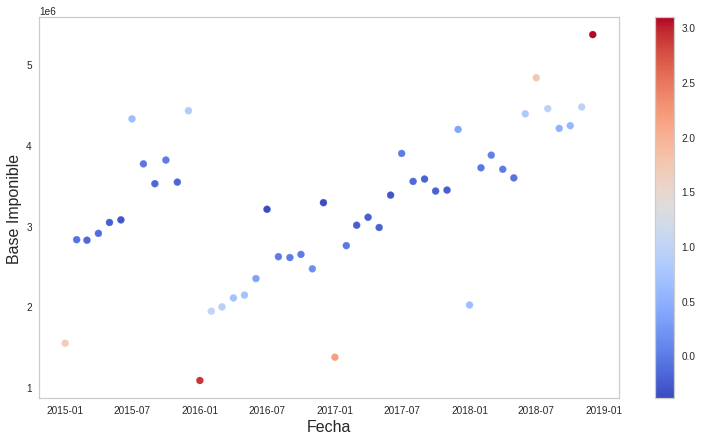

In [33]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo01_results['fecha'], modelo01_results['base imponible'], 
                c = modelo01_results["Anomaly_Score"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

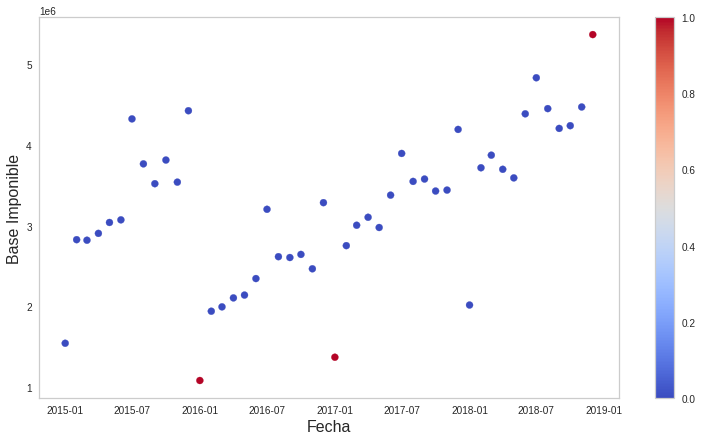

In [34]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo01_results['fecha'], modelo01_results['base imponible'], 
                c = modelo01_results["Anomaly"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

# Modelo Cluster

In [35]:
modelo02 = create_model('cluster')
print(modelo02)
modelo02_results = assign_model(modelo02)
modelo02_results.sort_index(inplace=True)
modelo02_results

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=None, random_state=123,
   use_weights=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=None, random_state=123,
   use_weights=False), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Clustering-Based Local Outlier
INFO:logs:Copying data
INFO:logs:(48, 4)
INFO:logs:assign_model() succesfully completed......................................


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=None, random_state=123,
   use_weights=False)


,base imponible,fecha,Anomaly,Anomaly_Score
0,1542649.10,2015-01-01,0,1.105939
1,2826481.24,2015-02-01,0,1.068239
2,2819790.62,2015-03-01,0,1.071265
3,2904493.66,2015-04-01,0,0.894571
4,3039687.52,2015-05-01,0,1.041138
5,3072099.48,2015-06-01,0,1.263122
6,4323380.30,2015-07-01,0,1.119358
7,3765954.38,2015-08-01,0,1.245437
8,3520353.40,2015-09-01,0,0.903721
9,3813516.78,2015-10-01,0,0.995867


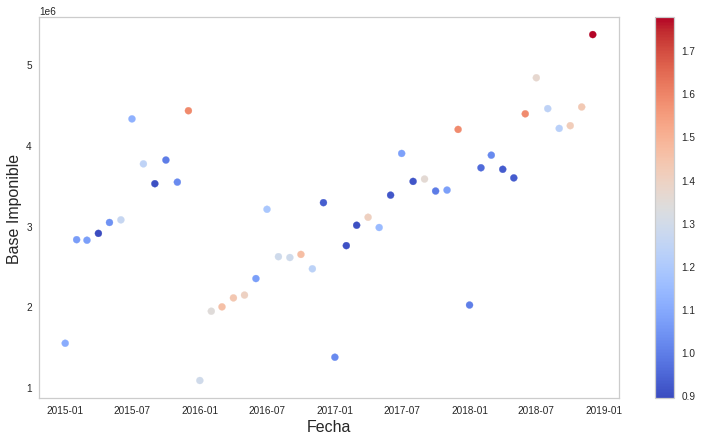

In [36]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo02_results['fecha'], modelo02_results['base imponible'], 
                c = modelo02_results["Anomaly_Score"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

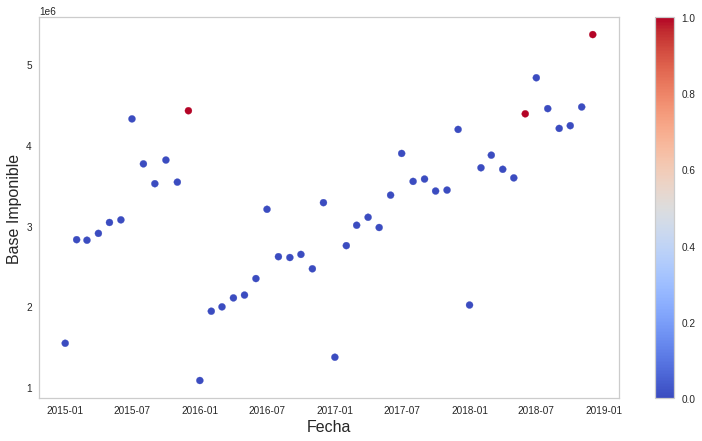

In [37]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo02_results['fecha'], modelo02_results['base imponible'], 
                c = modelo02_results["Anomaly"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

# Modelo cof

In [38]:
modelo03 = create_model('cof')
print(modelo03)
modelo03_results = assign_model(modelo03)
modelo03_results.sort_index(inplace=True)
modelo03_results

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:COF(contamination=0.05, method='fast', n_neighbors=None)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=COF(contamination=0.05, method='fast', n_neighbors=None), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Connectivity-Based Local Outlier
INFO:logs:Copying data
INFO:logs:(48, 4)
INFO:logs:assign_model() succesfully completed......................................


COF(contamination=0.05, method='fast', n_neighbors=None)


,base imponible,fecha,Anomaly,Anomaly_Score
0,1542649.10,2015-01-01,0,1.031352
1,2826481.24,2015-02-01,0,0.974448
2,2819790.62,2015-03-01,0,0.974283
3,2904493.66,2015-04-01,0,0.971299
4,3039687.52,2015-05-01,0,1.003198
5,3072099.48,2015-06-01,0,0.999295
6,4323380.30,2015-07-01,0,1.035926
7,3765954.38,2015-08-01,0,0.977121
8,3520353.40,2015-09-01,0,0.989752
9,3813516.78,2015-10-01,0,0.980937


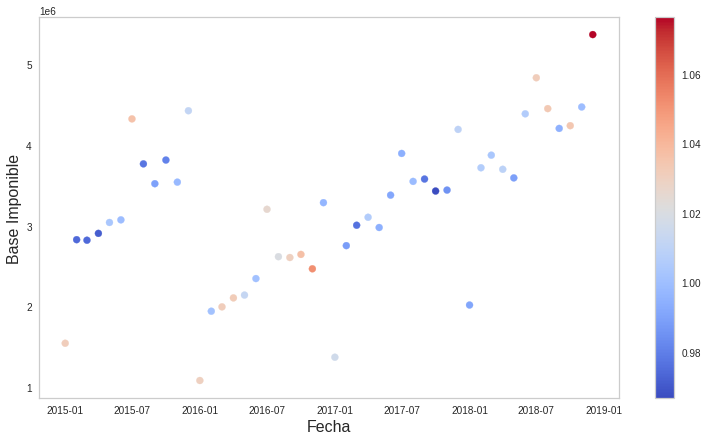

In [39]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo03_results['fecha'], modelo03_results['base imponible'], 
                c = modelo03_results["Anomaly_Score"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

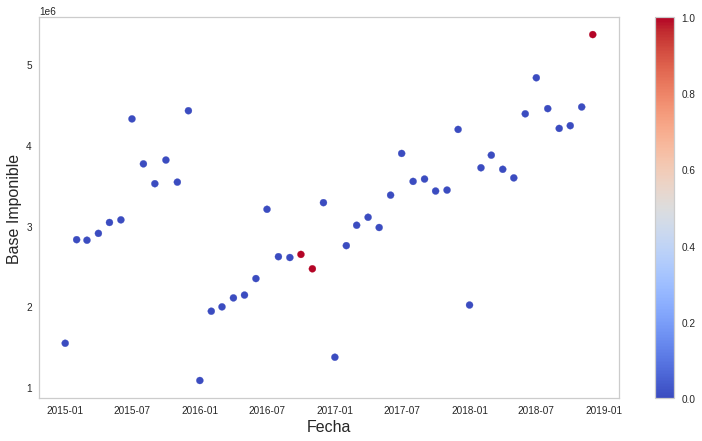

In [40]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo03_results['fecha'], modelo03_results['base imponible'], 
                c = modelo03_results["Anomaly"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

# Modelo iforest

In [41]:
modelo04 = create_model('iforest')
print(modelo04)
modelo04_results = assign_model(modelo04)
modelo04_results.sort_index(inplace=True)
modelo04_results

INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(48, 4)
INFO:logs:assign_model() succesfully completed......................................


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


,base imponible,fecha,Anomaly,Anomaly_Score
0,1542649.10,2015-01-01,0,-0.036841
1,2826481.24,2015-02-01,0,-0.046988
2,2819790.62,2015-03-01,0,-0.057610
3,2904493.66,2015-04-01,0,-0.062459
4,3039687.52,2015-05-01,0,-0.044355
5,3072099.48,2015-06-01,0,-0.037834
6,4323380.30,2015-07-01,0,-0.047280
7,3765954.38,2015-08-01,0,-0.044280
8,3520353.40,2015-09-01,0,-0.035251
9,3813516.78,2015-10-01,0,-0.031838


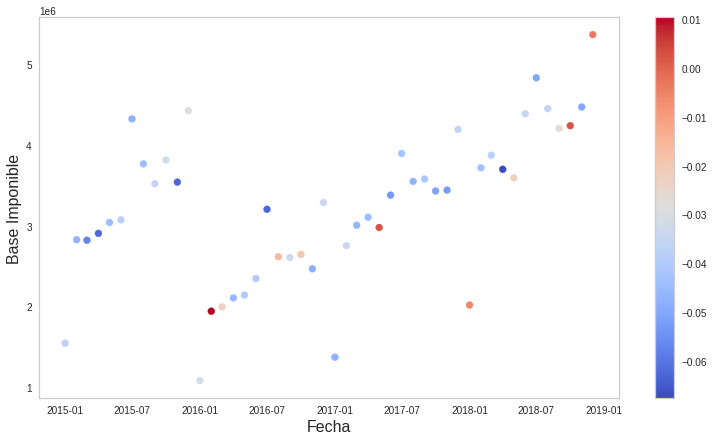

In [42]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo04_results['fecha'], modelo04_results['base imponible'], 
                c = modelo04_results["Anomaly_Score"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

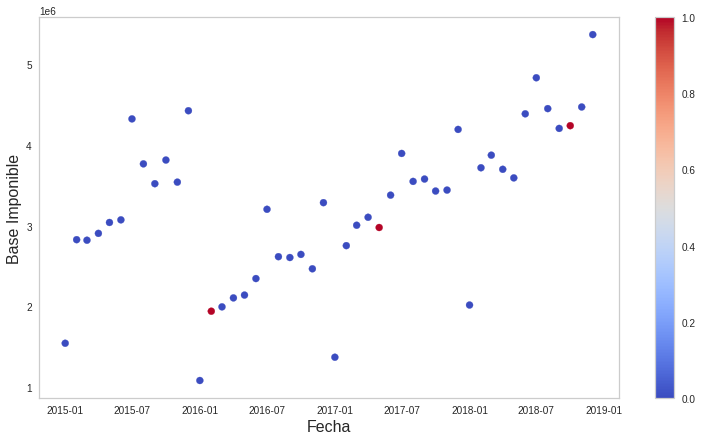

In [43]:
plt.figure(figsize = (13, 7))
s = plt.scatter(modelo04_results['fecha'], modelo04_results['base imponible'], 
                c = modelo04_results["Anomaly"], cmap = 'coolwarm')
plt.colorbar(s, label = '')
plt.xlabel('Fecha', fontsize = 16)
plt.ylabel('Base Imponible', fontsize = 16)
plt.grid()

# Análisis predictivo en serie de tiempo

## Facebook Prophet

In [44]:
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

## Preparación de los datos para forecasting

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   base imponible  48 non-null     float64       
 1   fecha           48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [46]:
df = df[["fecha","base imponible"]]

In [47]:
df = df.rename(columns={"fecha":"ds","base imponible":"y"})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


## Modelo 01, predicción en serie de tiempo

In [49]:
model = Prophet(yearly_seasonality=True)
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlwygxsq/xrh8v33_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlwygxsq/432da53_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55088', 'data', 'file=/tmp/tmpmlwygxsq/xrh8v33_.json', 'init=/tmp/tmpmlwygxsq/432da53_.json', 'output', 'file=/tmp/tmpmlwygxsq/prophet_modelza62gca8/prophet_model-20221026115714.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:57:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:57:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Predicción

In [50]:
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

### Graficos de la predicción

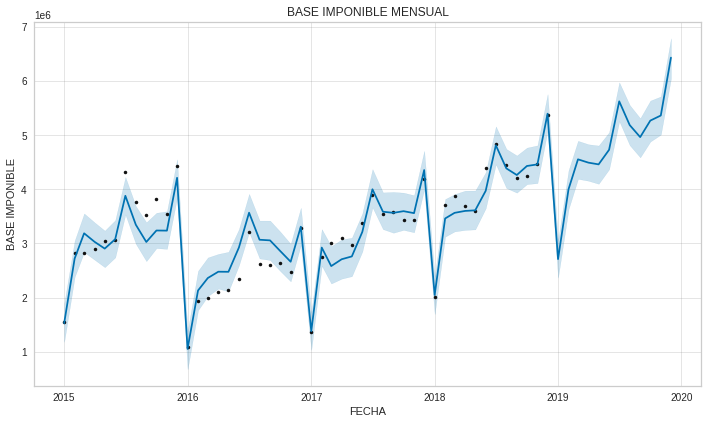

In [51]:
fig = model.plot(forecast, xlabel='FECHA', ylabel=r'BASE IMPONIBLE')
plt.title('BASE IMPONIBLE MENSUAL')
plt.show()

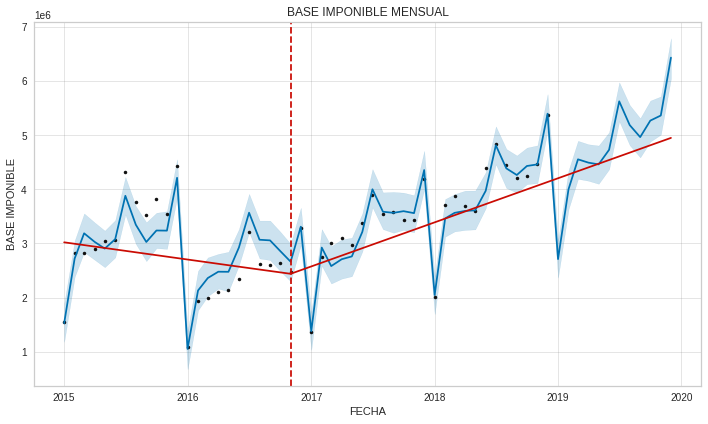

In [52]:
fig = model.plot(forecast, xlabel='FECHA', ylabel=r'BASE IMPONIBLE')
plt.title('BASE IMPONIBLE MENSUAL')
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()